# Import des paquets
Les différents paquets sont importés.
En plus, `matplotlib` est configuré pour avoir des figures un peu plus "sympa" !

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import signal

matplotlib.style.use('fivethirtyeight')
plt.rcParams["font.sans-serif"] = "Raleway"

# Calcul du filtre RC théorique
La fonction de Butterworth modélise le comportement d'un filtre composé d'une résistance de $100\ k\Omega$ et $1.5\ nF$.
L'évolution de la fonction de transfert est calculé par la fonction `freqs`
Les valeurs de fréquence et de gain sont calculées pour l'affichage.


In [18]:
b, a = signal.butter(1, 1.0/(100e3*1.5e-9), 'low', analog=True)
w, h = signal.freqs(b, a)
f_th = w/2*np.pi
g_th = 20 * np.log10(abs(h))

# Lecture des données pratiques
Les données issues des mesures automatiques sont converties en flottants et placées dans un `array` pour simplifier les calculs ultérieurs. Les valeurs de fréquences sont utilisables directement par contre, il faut calculer le gain en décibels à partir des valeurs de tension d'entrée et de sortie.

In [19]:
resultats = []
with open("MesuresRCcomplet.csv", "r") as f:
    reader = csv.reader(f, delimiter=',')    
    next(reader, None) # pour supprimer la première ligne
    for line in reader:
        resultats.append([float(_) for _ in  line ])
results = np.array(resultats)
f_me = results[:, 0]
g_me = 20 * np.log10(results[:, 2] / results[:, 1])

# Affichage des résultats
Les valeurs issues des calculs théoriques et des mesures sont affichées sur le même graphes à l'aide de `matplotlib`.

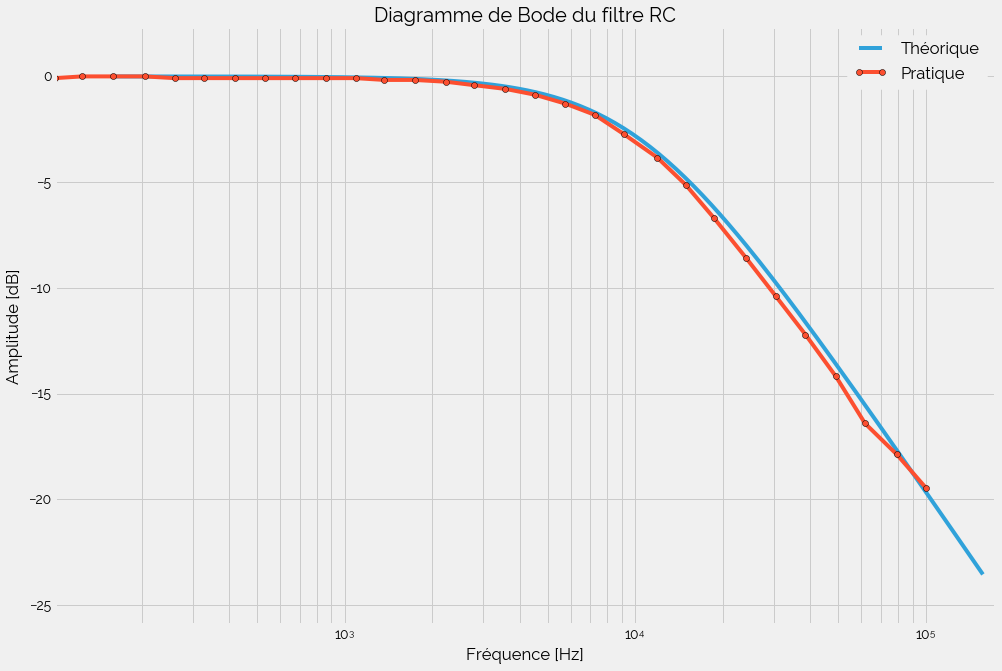

In [20]:
plt.figure(figsize=(15, 10))
plt.semilogx(f_th, g_th, '-')
plt.semilogx(f_me, g_me, '-o')
plt.grid(True, 'minor')
plt.grid(True, 'major')
plt.ylabel('Amplitude [dB]')
plt.xlabel(u'Fréquence [Hz]')
plt.title("Diagramme de Bode du filtre RC")
plt.legend(("Théorique","Pratique"))
plt.margins(0.1, 0.1)
plt.savefig("FiltreRCGain.png")
plt.show()

# Représentation de la phase
La phase théorique est représentée par l'argument de la fonction de transfert. Pour la phase pratique, elle calculée à partir de la valeur du retard du passage à zéro entre l'entrée et la sortie du filtre et la période. La valeur est comprise entre 0 et 1, elle doit être multiplée par $2\pi$ pour être convertie en radians.
Les courbes théorique et pratique sont ensuite dessinées sur le même diagramme.

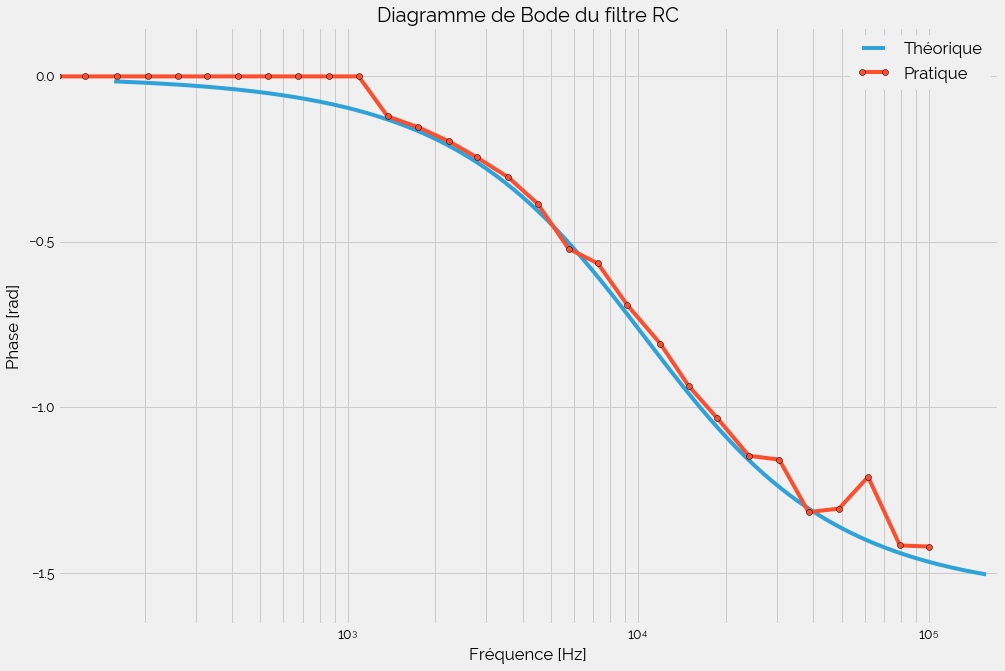

In [21]:
ph_th = np.angle(h)
periods = 1.0/results[:, 0]
ph_me = -2.0*np.pi*(results[:, 3]/periods)
plt.figure(figsize=(15, 10))
plt.semilogx(f_th, ph_th, '-')
plt.semilogx(f_me, ph_me, '-o')
plt.grid(True, 'minor')
plt.grid(True, 'major')
plt.ylabel('Phase [rad]')
plt.xlabel(u'Fréquence [Hz]')
plt.title("Diagramme de Bode du filtre RC")
plt.legend(("Théorique","Pratique"))
plt.margins(0.1, 0.1)
plt.savefig("FiltreRCPhase.png")
plt.show()